<a href="https://colab.research.google.com/github/thisisjeevan/2320030046_AIML_Programs/blob/main/A_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shortest path from A to J: A -> F -> G -> I -> J
Total cost: 10


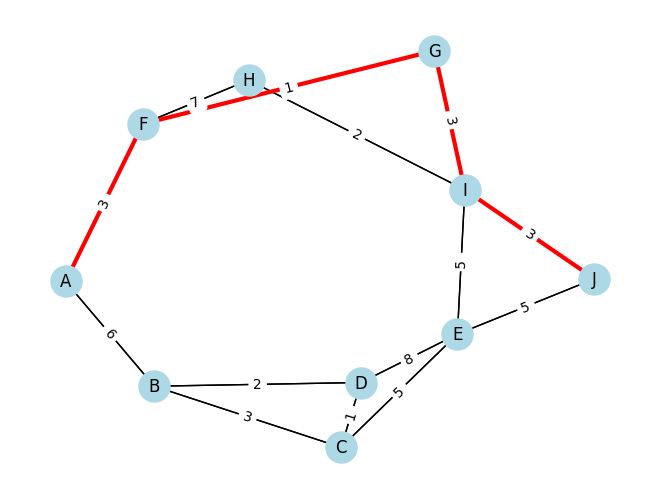

In [3]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

def create_graph():
    G = nx.Graph()
    edges = [
        ('A', 'B', 6), ('A', 'F', 3),
        ('B', 'C', 3), ('B', 'D', 2),
        ('C', 'D', 1), ('C', 'E', 5),
        ('D', 'E', 8),
        ('E', 'I', 5), ('E', 'J', 5),
        ('F', 'G', 1), ('F', 'H', 7),
        ('G', 'I', 3),
        ('H', 'I', 2),
        ('I', 'J', 3)
    ]
    G.add_weighted_edges_from(edges)

    # Add heuristic values
    heuristics = {
        'A': 10, 'B': 8, 'C': 5, 'D': 7,
        'E': 3, 'F': 6, 'G': 5, 'H': 3,
        'I': 1, 'J': 0
    }
    nx.set_node_attributes(G, heuristics, 'heuristic')

    return G

def heuristic(node, goal, G):
    return G.nodes[node]['heuristic']

def astar(graph, start, goal):
    frontier = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            break

        for next_node in graph.neighbors(current_node):
            new_cost = cost_so_far[current_node] + graph[current_node][next_node]['weight']
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost + heuristic(next_node, goal, graph)
                heapq.heappush(frontier, (priority, next_node))
                came_from[next_node] = current_node

    # Reconstruct path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path, cost_so_far[goal]

def display_graph_and_path(graph, path):
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'weight')

    # Draw nodes
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightblue')

    # Draw edges
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), width=1)

    # Highlight path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=3, edge_color='r')

    # Draw edge weights
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.show()

# Create the graph
G = create_graph()

# Run A* algorithm
start_node = 'A'
goal_node = 'J'
path, cost = astar(G, start_node, goal_node)

print(f"Shortest path from {start_node} to {goal_node}: {' -> '.join(path)}")
print(f"Total cost: {cost}")

# Display the graph and the path found
display_graph_and_path(G, path)
